In [1]:
"""
Analysis of netCDF data from sentinel following the jupyter notebook
https://github.com/bilelomrani1/s5p-analysis/blob/master/s5p-analysis.ipynb
"""
import xarray as xr
import numpy as np
import pandas as pd
from itertools import product, cycle

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.font_manager as fm
import seaborn as sns;sns.set();sns.set_style("white")

In [2]:
xr.set_options(keep_attrs=True)
DS = xr.open_dataset('../../s5p-tools/processed/processed__NO2___/NO2___1-6-2020__4-6-2020.nc')
VARIABLE = 'tropospheric_NO2_column_number_density'

In [3]:
DS

<xarray.Dataset>
Dimensions:                                  (latitude: 11, longitude: 26, time: 14)
Coordinates:
  * latitude                                 (latitude) float64 50.8 ... 50.9
  * longitude                                (longitude) float64 4.256 ... 4.506
  * time                                     (time) datetime64[ns] 2020-06-01...
Data variables: (12/13)
    sensor_altitude                          (time, latitude, longitude) float64 ...
    solar_zenith_angle                       (time, latitude, longitude) float64 ...
    solar_azimuth_angle                      (time, latitude, longitude) float64 ...
    sensor_zenith_angle                      (time, latitude, longitude) float64 ...
    sensor_azimuth_angle                     (time, latitude, longitude) float64 ...
    tropospheric_NO2_column_number_density   (time, latitude, longitude) float64 ...
    ...                                       ...
    stratospheric_NO2_column_number_density  (time, latitude, longitude) float64 ...
    NO2_slant_column_number_density          (time, latitude, longitude) float64 ...
    cloud_fraction                           (time, latitude, longitude) float64 ...
    absorbing_aerosol_index                  (time, latitude, longitude) float64 ...
    tropopause_pressure                      (time, latitude, longitude) float64 ...
    spatial_ref                              int64 ...
Attributes:
    Conventions:     HARP-1.0
    source_product:  S5P_OFFL_L2__NO2____20200604T110848_20200604T125018_1369...
    history:         2021-09-21T08:35:22Z [harp-1.11] harp.import_product('L2...

In [8]:
# Two measurements per day
DS['time']

<xarray.DataArray 'time' (time: 14)>
array(['2020-06-01T00:36:53.000000000', '2020-06-01T02:18:23.000000000',
       '2020-06-01T10:45:53.000000000', '2020-06-01T12:27:23.000000000',
       '2020-06-02T00:17:52.000000000', '2020-06-02T01:59:23.000000000',
       '2020-06-02T10:26:53.000000000', '2020-06-02T12:08:23.000000000',
       '2020-06-02T23:58:53.000000000', '2020-06-03T01:40:22.000000000',
       '2020-06-03T11:49:23.000000000', '2020-06-03T23:39:51.000000000',
       '2020-06-04T01:21:22.000000000', '2020-06-04T11:30:22.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-06-01T00:36:53 ... 2020-06-04T11:30:22

In [4]:
DS['latitude']

<xarray.DataArray 'latitude' (latitude: 11)>
array([50.800074, 50.810074, 50.820074, 50.830074, 50.840074, 50.850074,
       50.860074, 50.870074, 50.880074, 50.890074, 50.900074])
Coordinates:
  * latitude  (latitude) float64 50.8 50.81 50.82 50.83 ... 50.88 50.89 50.9
Attributes:
    units:    degree_north

In [5]:
DS['longitude']

<xarray.DataArray 'longitude' (longitude: 26)>
array([4.256242, 4.266242, 4.276242, 4.286242, 4.296242, 4.306242, 4.316242,
       4.326242, 4.336242, 4.346242, 4.356242, 4.366242, 4.376242, 4.386242,
       4.396242, 4.406242, 4.416242, 4.426242, 4.436242, 4.446242, 4.456242,
       4.466242, 4.476242, 4.486242, 4.496242, 4.506242])
Coordinates:
  * longitude  (longitude) float64 4.256 4.266 4.276 4.286 ... 4.486 4.496 4.506
Attributes:
    units:    degree_east

In [6]:
len(DS['tropospheric_NO2_column_number_density'][1])

11

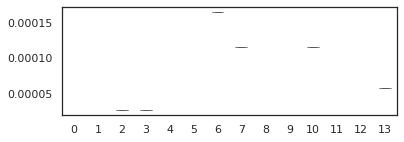

In [7]:
# take the average for all lat/long and then plot the avg over time
# Monday=0, Sunday=6
boxes_weekday = [group[VARIABLE].values for _,group in DS.mean(dim='longitude').mean(dim='latitude').groupby('time')]

WEEKDAYS_LABEL = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

fig = plt.figure(figsize=(6,2))
#ax = plt.axes()
#ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True, useOffset=True))

boxplot = sns.boxplot(data=boxes_weekday,
                      linewidth=0.5, width=0.5, saturation=0.5, showfliers=False, color="slategrey")
#boxplot.set_xticklabels(WEEKDAYS_LABEL)
#plt.ylabel(LABEL, labelpad=10)
plt.show()

#plt.savefig("{folder_plots}/box_plot_weekdays_NO2.{format}".format(folder_plots=folder_plots,
#                                                                 format=FORMAT_EXPORT),
#            bbox_inches='tight', dpi=300)
